## Outline for taking a derivative numerically


1. define a function (def statement)
2. specify start value for x and an end value for x
3. start a Storage for calculated values
4. set x value to the start value
5. calculate the slope at that value (rise/run) = (f(x+dx)-f(x))/dx
6. add the calculated values to the Storage
7. step the x value by small step called dx
8. repeat until x value is after the end value
9. at the end, plot the Stored values

In [1]:
%matplotlib inline
from pylab import *
from sci378 import *

Version:  0.0.30


In [2]:
def f(x):
    # f(x)=4x^3-2x^2  in math
    return 4*x**3-2*x**2

In [3]:
x_start=-2
x_end=2
dx=0.1

## plot the function 

(-1.0, 1.0)

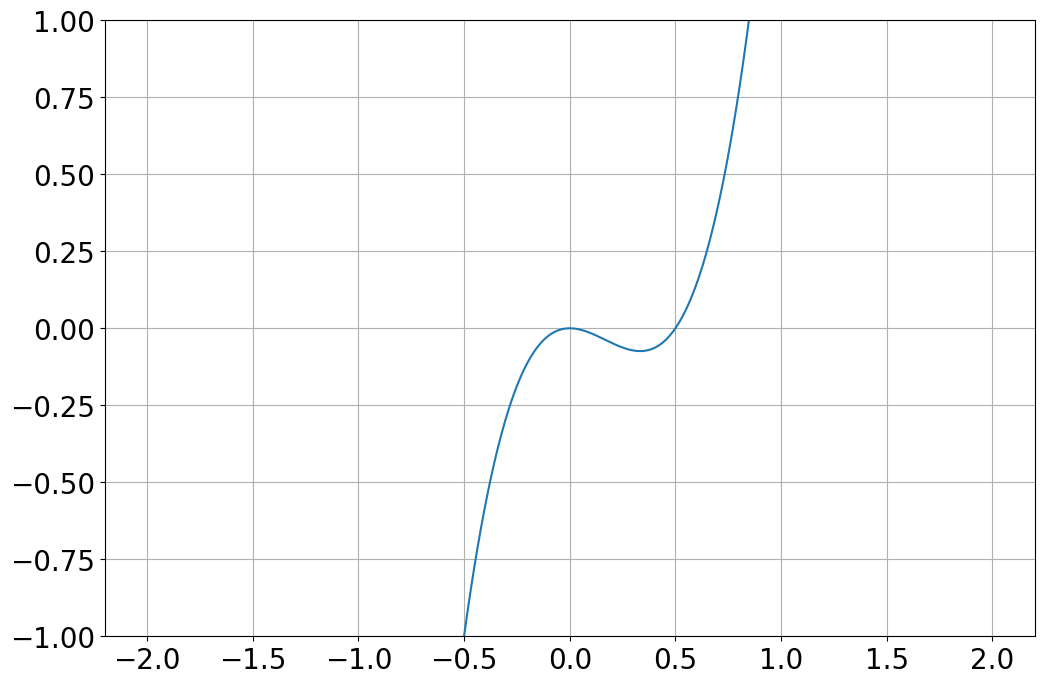

In [4]:
x=linspace(x_start,x_end,500)
y=f(x)
plot(x,y)
ylim([-1,1])

In [5]:
x=x_start
print(x)
S=Storage()
while x<=x_end:

    # calculate the slope at that value (rise/run) = (f(x+dx)-f(x))/dx
    # add the calculated values to the Storage
    #step the x value by small step called dx

    slope=(f(x+dx)-f(x))/dx

    S+=x,slope
    
    x=x+dx

    
x,slope=S.arrays()
x

-2


array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        6.38378239e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00])

In [6]:
slope

array([53.44, 48.48, 43.76, 39.28, 35.04, 31.04, 27.28, 23.76, 20.48,
       17.44, 14.64, 12.08,  9.76,  7.68,  5.84,  4.24,  2.88,  1.76,
        0.88,  0.24, -0.16, -0.32, -0.24,  0.08,  0.64,  1.44,  2.48,
        3.76,  5.28,  7.04,  9.04, 11.28, 13.76, 16.48, 19.44, 22.64,
       26.08, 29.76, 33.68, 37.84])

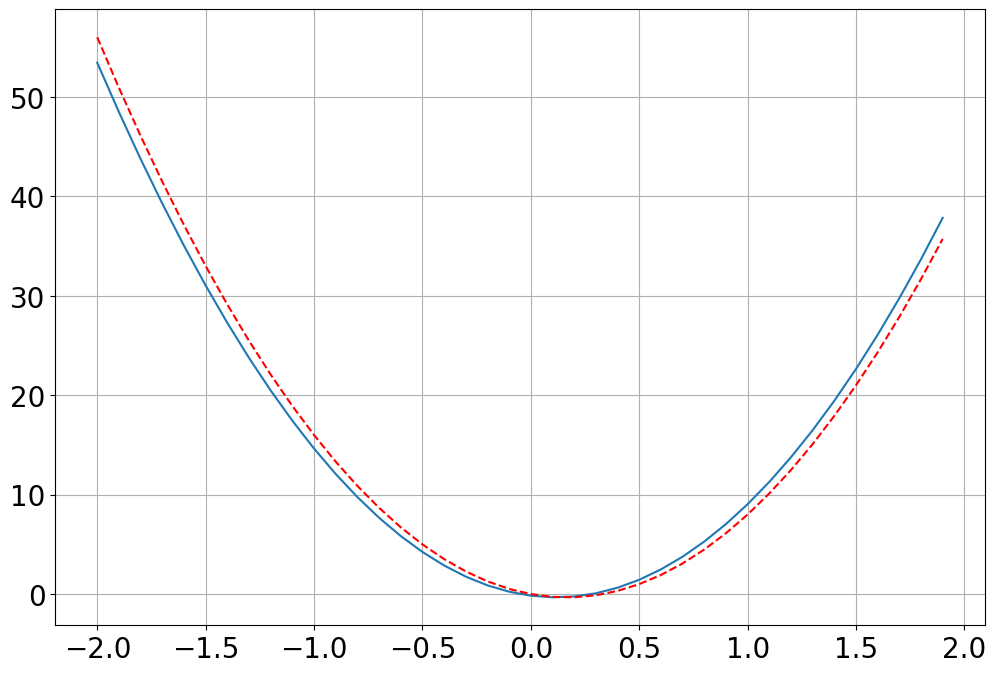

In [7]:
plot(x,slope)

slope_expected=12*x**2-4*x
plot(x,slope_expected,'r--')

redo with smaller step size dx

-2


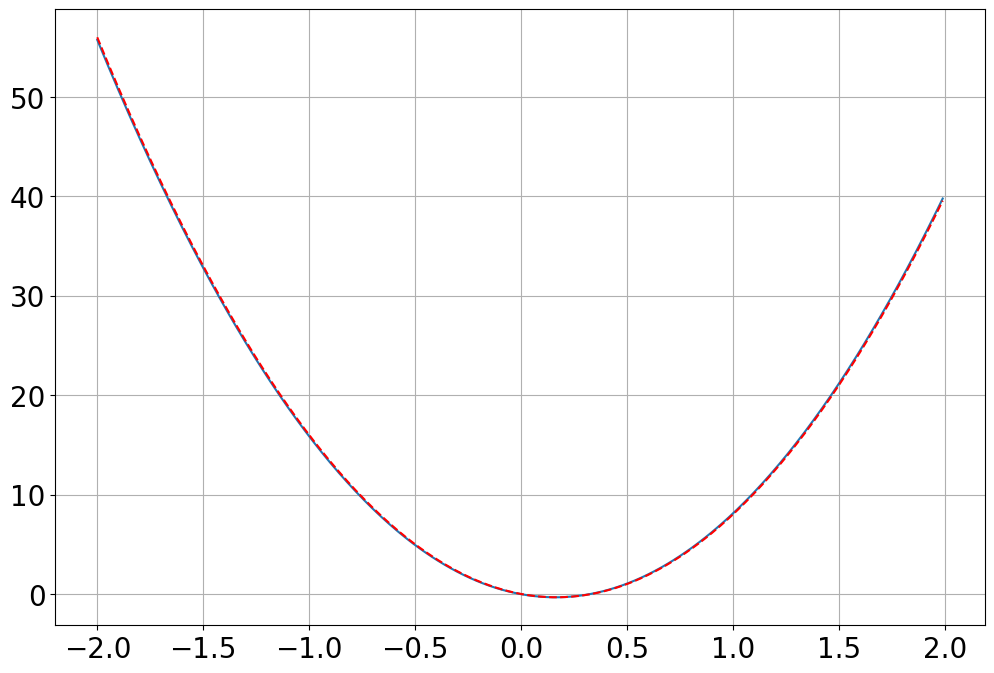

In [8]:
x_start=-2
x_end=2
dx=0.01

x=x_start
print(x)
S=Storage()
while x<=x_end:

    # calculate the slope at that value (rise/run) = (f(x+dx)-f(x))/dx
    # add the calculated values to the Storage
    #step the x value by small step called dx

    slope=(f(x+dx)-f(x))/dx

    S+=x,slope
    
    x=x+dx

    
x,slope=S.arrays()

plot(x,slope)

slope_expected=12*x**2-4*x
plot(x,slope_expected,'r--')

In [9]:
x_start=-2
x_end=2
dx=0.01

x=x_start
S=Storage()
while x<=x_end:

    # calculate the area at that value
    # add the calculated values to the Storage
    #step the x value by small step called dx

    slope=(f(x+dx)-f(x))/dx
    area_rectangle=f(x)*dx
    area_triangle=1/2*dx*(f(x+dx)-f(x))
    area=area_rectangle+area_triangle
    
    S+=x,slope,area
    
    x=x+dx

    
x,slope,area=S.arrays()


derivative is fine

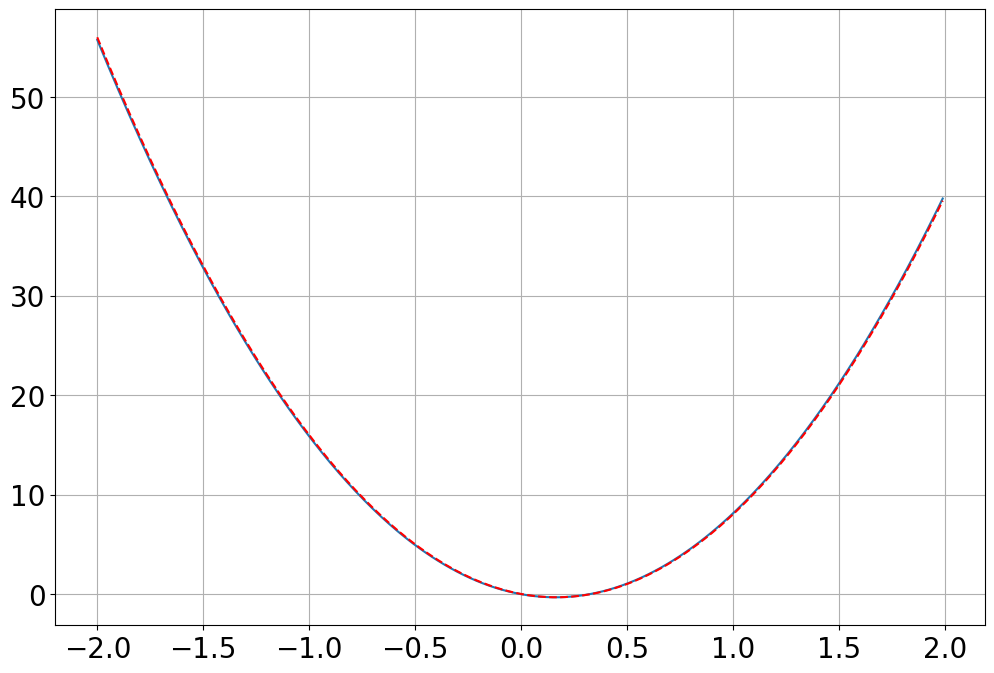

In [10]:

plot(x,slope)

slope_expected=12*x**2-4*x
plot(x,slope_expected,'r--')

integral is way wrong

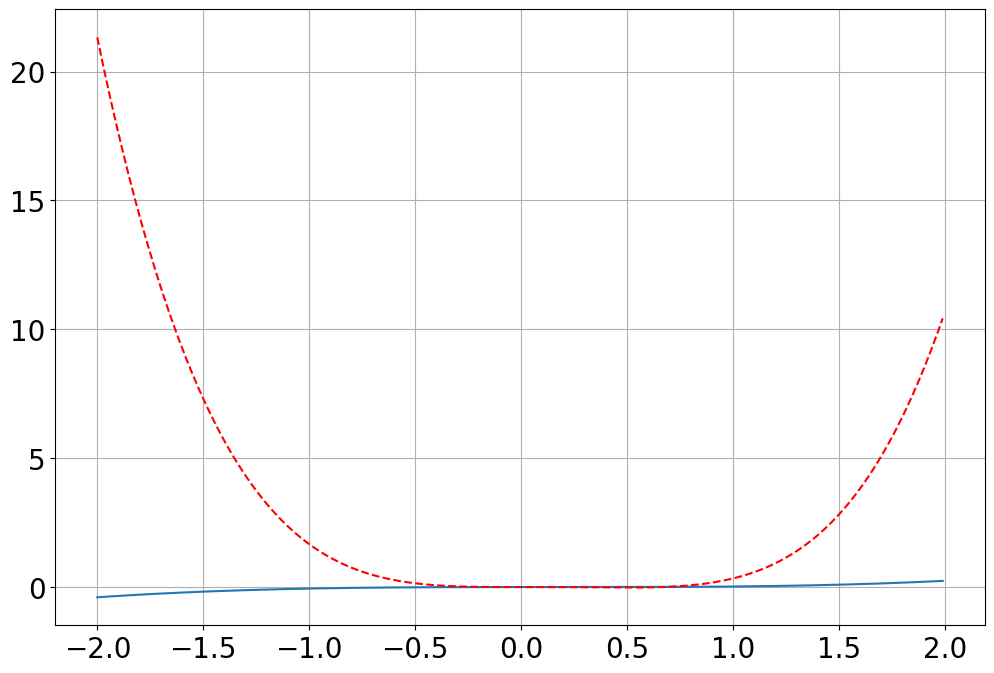

In [11]:

plot(x,area)

area_expected=x**4-2*x**3/3
plot(x,area_expected,'r--')

fixing the integral

In [12]:
x_start=-2
x_end=2
dx=0.01

x=x_start
S=Storage()
area=0
while x<=x_end:

    # calculate the area at that value
    # add the calculated values to the Storage
    #step the x value by small step called dx

    slope=(f(x+dx)-f(x))/dx
    area_rectangle=f(x)*dx
    area_triangle=1/2*dx*(f(x+dx)-f(x))
    area=area+area_rectangle+area_triangle
    
    S+=x,slope,area
    
    x=x+dx

    
x,slope,area=S.arrays()


off by a constant

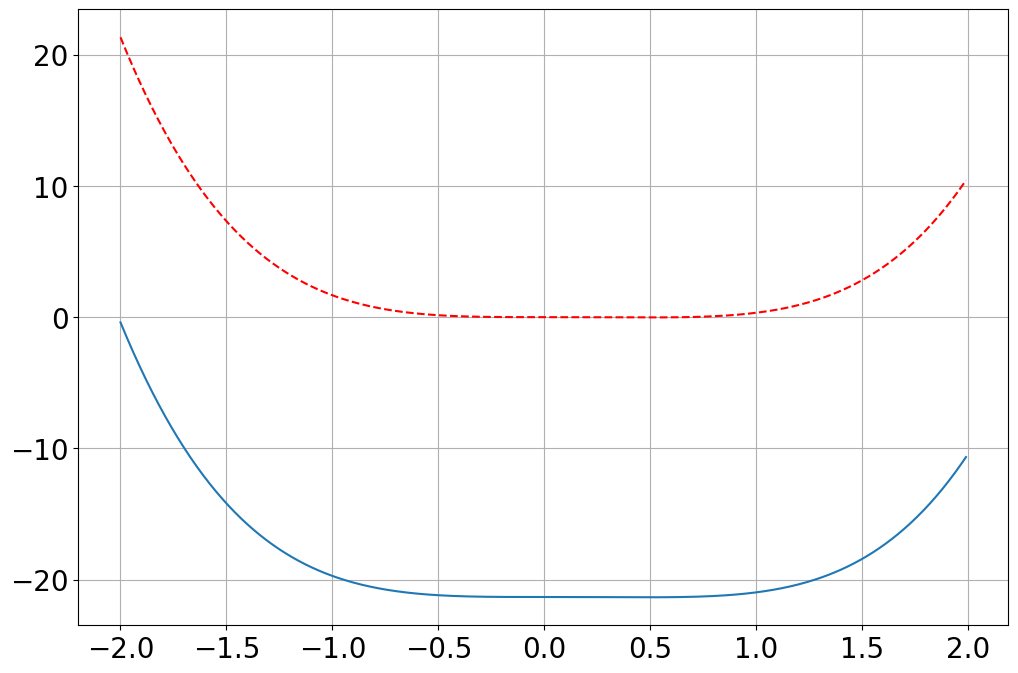

In [13]:
plot(x,area)

area_expected=x**4-2*x**3/3
plot(x,area_expected,'r--')

yay!

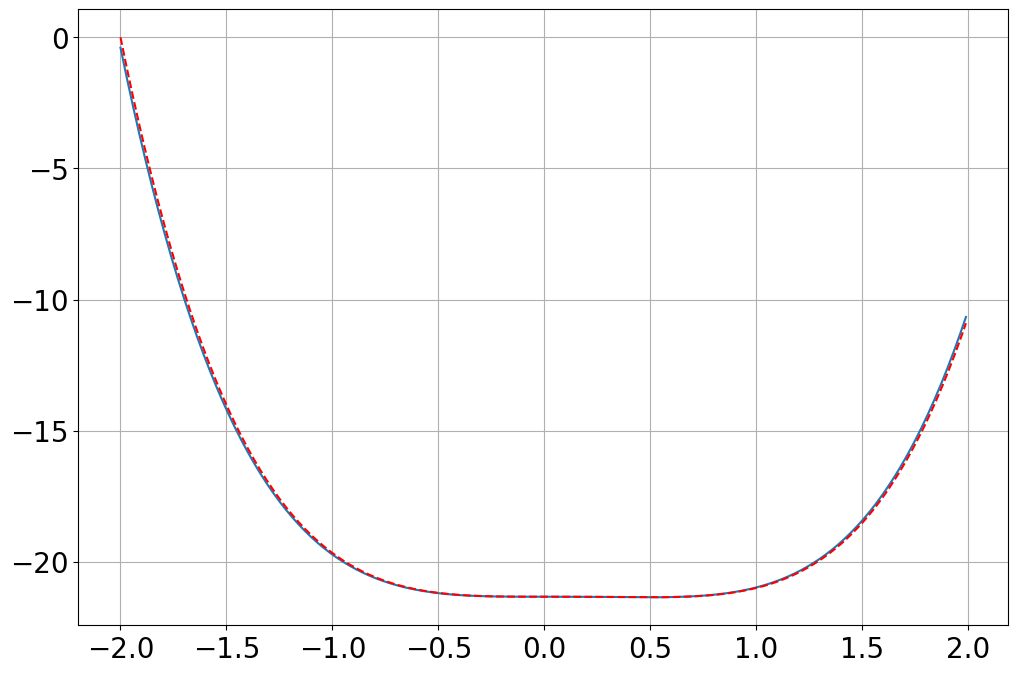

In [14]:
plot(x,area)

area_expected=x**4-2*x**3/3-(x_start**4-2*x_start**3/3)
plot(x,area_expected,'r--')

## Maxima and Minima

(-1.0, 1.0)

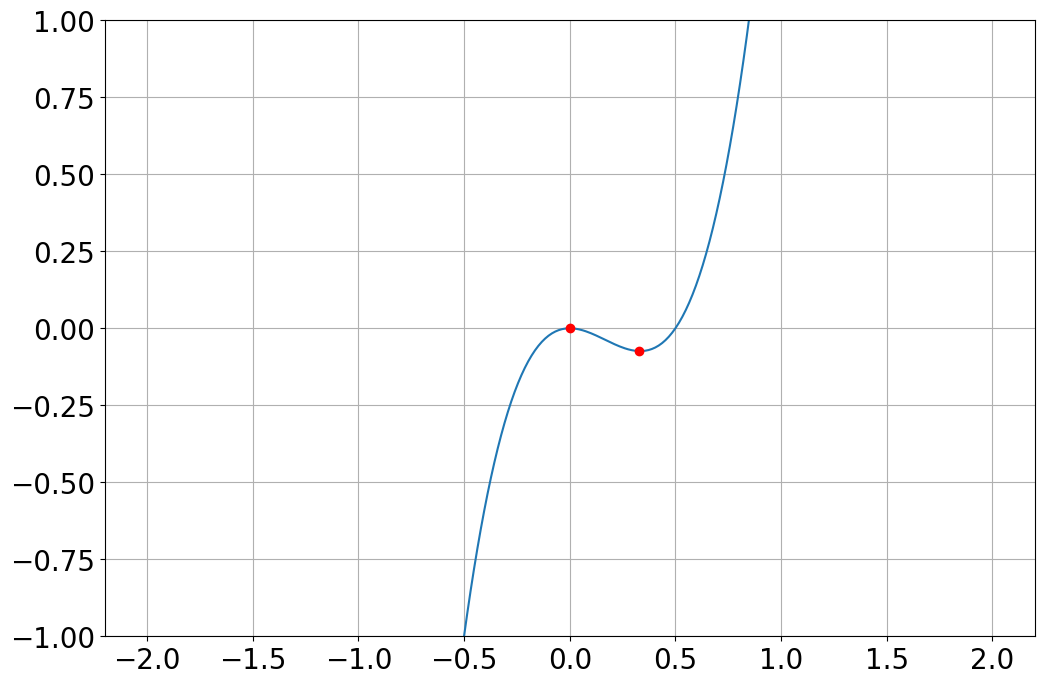

In [15]:
x_start=-2
x_end=2
dx=0.01

x=x_start
S=Storage()
while x<=x_end:

    # calculate the area at that value
    # add the calculated values to the Storage
    #step the x value by small step called dx

    
    slope=(f(x+dx)-f(x))/dx
    previous_slope=(f(x)-f(x-dx))/dx

    if sign(slope)!=sign(previous_slope):  # when it changes sign it's a zero
        S+=x,f(x)
    
    x=x+dx

    
min_x,min_y=S.arrays()

# plot the function
x=linspace(x_start,x_end,500)
y=f(x)
plot(x,y)

plot(min_x,min_y,'ro')
ylim([-1,1])